<img src="logo.jpg" />

## [Prof. Pedram Jahangiry](https://huntsman.usu.edu/directory/jahangiry-pedram) 
[GitHub account](https://github.com/PJalgotrader) 

[YouTube Channel](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ/playlists) 

# K Nearest Neigbors (KNN) - Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [2]:
rand_state = 1000

In [3]:
df = pd.read_csv("wage.csv")

In [4]:
df.head()

,wage,hours,IQ,educ,exper,tenure,age,married,black,meduc,feduc
0,769000.0,40,93,12,11,2,31,1,0,8.0,8.0
1,808000.0,50,119,18,11,16,37,1,0,14.0,14.0
2,825000.0,40,108,14,11,9,33,1,0,14.0,14.0
3,650000.0,40,96,12,13,7,32,1,0,12.0,12.0
4,562000.0,40,74,11,14,5,34,1,0,6.0,11.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 11 columns):
wage       935 non-null float64
hours      935 non-null int64
IQ         935 non-null int64
educ       935 non-null int64
exper      935 non-null int64
tenure     935 non-null int64
age        935 non-null int64
married    935 non-null int64
black      935 non-null int64
meduc      857 non-null float64
feduc      741 non-null float64
dtypes: float64(3), int64(8)
memory usage: 80.4 KB


## Data preprocessing 

In [6]:
df.isna().sum()  

wage         0
hours        0
IQ           0
educ         0
exper        0
tenure       0
age          0
married      0
black        0
meduc       78
feduc      194
dtype: int64

In [7]:
df.drop('feduc', axis=1, inplace=True)

In [8]:
df['meduc'].fillna(df['meduc'].median(),axis=0, inplace=True )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 10 columns):
wage       935 non-null float64
hours      935 non-null int64
IQ         935 non-null int64
educ       935 non-null int64
exper      935 non-null int64
tenure     935 non-null int64
age        935 non-null int64
married    935 non-null int64
black      935 non-null int64
meduc      935 non-null float64
dtypes: float64(2), int64(8)
memory usage: 73.1 KB


In [9]:
df.columns

Index(['wage', 'hours', 'IQ', 'educ', 'exper', 'tenure', 'age', 'married',
       'black', 'meduc'],
      dtype='object')

## Data visualization 

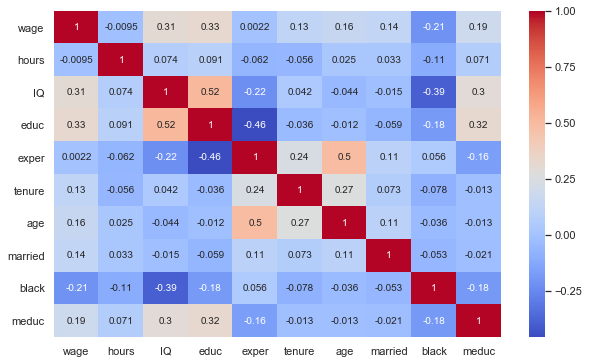

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)
plt.show()

## Scaling the features: 

The following step is very important for **KNN regression**. Because any variable on the larger scale, has a larger effect on the distance between observations. 

In this data set, because married and black are dummy variables, we don't need to standardize them! 

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_sc= scaler.fit_transform(df)

In [12]:
df_sc = pd.DataFrame(df_sc, columns=df.columns)
df_sc.head()

,wage,hours,IQ,educ,exper,tenure,age,married,black,meduc
0,-0.467520,-0.544210,-0.550521,-0.668851,-0.128912,-1.031884,-0.669710,0.346064,-0.383718,-1.015114
1,-0.371019,0.840756,1.177676,2.064038,-0.128912,1.728101,1.261947,0.346064,-0.383718,1.165962
2,-0.328955,-0.544210,0.446516,0.242112,-0.128912,0.348108,-0.025824,0.346064,-0.383718,1.165962
3,-0.761969,-0.544210,-0.351113,-0.668851,0.328518,-0.046175,-0.347767,0.346064,-0.383718,0.438937
4,-0.979713,-0.544210,-1.813433,-1.124333,0.557234,-0.440459,0.296119,0.346064,-0.383718,-1.742140


In [13]:
df_sc['married']=df['married']
df_sc['black']=df['black']
df_sc.head(3)

,wage,hours,IQ,educ,exper,tenure,age,married,black,meduc
0,-0.467520,-0.544210,-0.550521,-0.668851,-0.128912,-1.031884,-0.669710,1,0,-1.015114
1,-0.371019,0.840756,1.177676,2.064038,-0.128912,1.728101,1.261947,1,0,1.165962
2,-0.328955,-0.544210,0.446516,0.242112,-0.128912,0.348108,-0.025824,1,0,1.165962


### Defining the variables and splitting the data

In [14]:
y = df_sc['wage']
X = df_sc.drop('wage', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

In [15]:
X_train.head()

,hours,IQ,educ,exper,tenure,age,married,black,meduc
932,0.148273,-1.614026,-0.668851,0.099803,0.545250,-1.635539,1,1,-1.378627
82,-0.544210,-0.351113,-1.124333,0.785949,-0.834743,1.261947,1,0,-1.015114
370,-0.544210,1.443552,1.608556,0.557234,-0.046175,1.583890,1,0,0.438937
452,-0.544210,0.512985,-0.668851,0.557234,-1.229026,0.940004,1,0,-0.651601
132,-0.544210,-0.284644,-0.668851,-0.357628,-0.637601,-0.669710,1,0,0.438937


###  KNN Regression with Sklearn

In [16]:
from sklearn.neighbors import KNeighborsRegressor

In [17]:
# Fitting KNN regression to the Training set

KNN_regression = KNeighborsRegressor(n_neighbors=5)
KNN_regression.fit(X_train, y_train)

KNeighborsRegressor()

Minkowski distance: https://en.wikipedia.org/wiki/Minkowski_distance

In [18]:
# Predicting the Test set results
y_hat = KNN_regression.predict(X_test)

In [19]:
predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat})
predictions.head()

,y_test,y_hat
434,0.042199,-0.455148
238,1.910343,1.547601
531,-0.700110,-0.901523
157,2.328510,0.821623
601,1.341239,0.724628


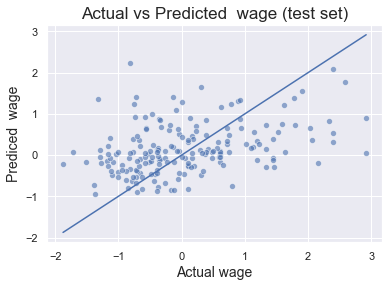

In [20]:
sns.scatterplot(x=y_test, y=y_hat, alpha=0.6)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual wage', fontsize=14)
plt.ylabel('Prediced  wage', fontsize=14)
plt.title('Actual vs Predicted  wage (test set)', fontsize=17)
plt.show()

In [21]:
X_train.shape

(748, 9)

**Exercise**: Now try k=748. What do you expect to see in the actual vs predicted plot?

----

## Performance metrics:

In [22]:
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
MSE_test

0.87

In [23]:
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

0.93

---

##  Cross validation

In KNN, we use cross validation to find the optimal value of K. 

In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
NMSE = cross_val_score(estimator = KNN_regression, X = X_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )

In [26]:
MSE_CV = round(np.mean(-NMSE),4)
MSE_CV

1.0105

In [27]:
RMSE_CV = round(np.sqrt(MSE_CV), 4)
RMSE_CV

1.0052

----------------

## Choosing K
 
Let's plot the RMSE_CV and RMSE_test vs K. 

In [28]:
RMSE_CV=[]
RMSE_test = []

k=40

for i in range(1,k):
    KNN_i = KNeighborsRegressor(n_neighbors=i)
    KNN_i.fit(X_train, y_train)
    RMSE_i = np.sqrt(np.mean(-1*cross_val_score(estimator = KNN_i, X = X_train, y = y_train, cv = 10 , scoring="neg_mean_squared_error" )))
    RMSE_CV.append(RMSE_i)
    
    RMSE_test.append(np.sqrt(np.mean(np.square(y_test - KNN_i.predict(X_test)))))
    
optimal_k = pd.DataFrame({'RMSE_CV': np.round(RMSE_CV,2), 'RMSE_test':np.round(RMSE_test,2)}, index=range(1,k))

In [29]:
optimal_k.head(10)

,RMSE_CV,RMSE_test
1,1.20,1.29
2,1.08,1.12
3,1.04,1.05
4,1.01,0.97
5,1.00,0.93
6,0.99,0.91
7,0.98,0.90
8,0.97,0.89
9,0.97,0.89
10,0.95,0.87


In [30]:
np.argmin(optimal_k['RMSE_CV'])

26

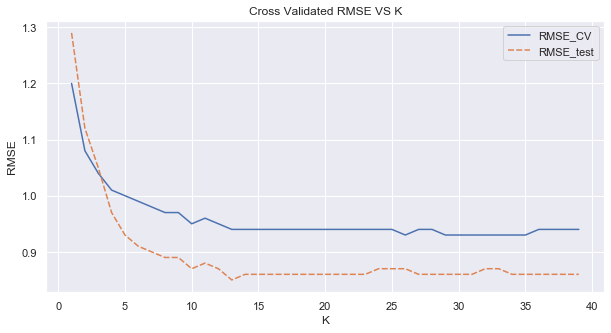

In [31]:
plt.figure(figsize=(10,5))
sns.lineplot(data=optimal_k)
plt.title('Cross Validated RMSE VS K')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.show()

By looking at this graph, What is the optimal K?

###  Additional links:
1. Minkowski distance: https://en.wikipedia.org/wiki/Minkowski_distance
2. Behind the scenes of Nearest Neigbor search: https://www.analyticsvidhya.com/blog/2017/11/information-retrieval-using-kdtree/